In [154]:
# The code was removed by Watson Studio for sharing.

In [155]:
data = df_data_1[['Loan Status','Current Loan Amount','Term','Credit Score','Annual Income','Years in current job','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit']]

### remove rows having attribute value NaN

In [156]:
data = data.dropna()

### changing loan status fully paid,charged off to 0,1

In [165]:
data=data.replace('Fully Paid', 1)
data=data.replace('Charged Off', 0)


### changing term{'short term','long term'} with 1 and 0.5 

In [160]:
data=data.replace('Short Term', 0.5)
data=data.replace('Long Term', 1)
data= data.replace('1 years', 1)
data= data.replace('1 year', 1)
data= data.replace('< 1 year', 0.9)
data= data.replace('2 years', 2)
data= data.replace('2 year', 2)
data= data.replace('3 years', 3)
data= data.replace('3 year', 3)
data= data.replace('4 years', 4)
data= data.replace('4 year', 4)
data= data.replace('5 years', 5)
data= data.replace('5 year', 5)
data= data.replace('6 years', 6)
data= data.replace('6 year', 6)
data= data.replace('7 years', 7)
data= data.replace('7 year', 7)
data= data.replace('8 years', 8)
data= data.replace('8 year', 8)
data= data.replace('9 years', 9)
data= data.replace('9 year', 9)
data= data.replace('10 years', 10)
data= data.replace('10 years', 10)
data= data.replace('10+ years', 11)
sample=data[['Years in current job']]

In [162]:
data.columns = data.columns.str.replace(' ', '')

In [166]:
#data_pandas = pd.DataFrame(data) to display whole data
#display(data_pandas)

In [216]:
#data['Yearsincurrentjob'].value_counts()

In [217]:
import numpy as np
from sklearn import preprocessing
#data.tail()


In [178]:
X = data[['CurrentLoanAmount','Term','CreditScore','AnnualIncome','Yearsincurrentjob','MonthlyDebt','YearsofCreditHistory','NumberofOpenAccounts','NumberofCreditProblems','CurrentCreditBalance','MaximumOpenCredit']] .values  #.astype(float)
X[0:99998]



array([[  4.45412000e+05,   5.00000000e-01,   7.09000000e+02, ...,
          1.00000000e+00,   2.28190000e+05,   4.16746000e+05],
       [  9.99999990e+07,   5.00000000e-01,   7.41000000e+02, ...,
          1.00000000e+00,   2.97996000e+05,   7.50090000e+05],
       [  3.47666000e+05,   1.00000000e+00,   7.21000000e+02, ...,
          0.00000000e+00,   2.56329000e+05,   3.86958000e+05],
       ..., 
       [  9.99999990e+07,   5.00000000e-01,   7.32000000e+02, ...,
          0.00000000e+00,   1.53045000e+05,   5.09234000e+05],
       [  1.03136000e+05,   5.00000000e-01,   7.42000000e+02, ...,
          1.00000000e+00,   1.09554000e+05,   5.37548000e+05],
       [  5.30332000e+05,   5.00000000e-01,   7.46000000e+02, ...,
          0.00000000e+00,   4.04225000e+05,   7.38254000e+05]])

In [179]:
y = data['LoanStatus'].values
y[0:99998]

array([1, 1, 1, ..., 1, 1, 1])

In [181]:
x = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:99998]

array([[ -4.04453996e-01,  -6.40673747e-01,  -2.47442488e-01, ...,
          1.73747878e+00,  -1.80280776e-01,  -4.60109191e-02],
       [  2.45021607e+00,  -6.40673747e-01,  -2.25622218e-01, ...,
          1.73747878e+00,   1.19023435e-03,   1.38832043e-03],
       [ -4.07256806e-01,   1.56085684e+00,  -2.39259887e-01, ...,
         -3.41744081e-01,  -1.07129288e-01,  -5.02465691e-02],
       ..., 
       [  2.45021607e+00,  -6.40673747e-01,  -2.31759169e-01, ...,
         -3.41744081e-01,  -3.75631307e-01,  -3.28597573e-02],
       [ -4.14268562e-01,  -6.40673747e-01,  -2.24940334e-01, ...,
          1.73747878e+00,  -4.88692587e-01,  -2.88336999e-02],
       [ -4.02018964e-01,  -6.40673747e-01,  -2.22212801e-01, ...,
         -3.41744081e-01,   2.77348215e-01,  -2.94677906e-04]])

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (61946, 11) (61946,)
Test set: (15487, 11) (15487,)


In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [213]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [214]:
yhat = neigh.predict(x_test)
yhat[0:1000]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [215]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.850611823201
Test set Accuracy:  0.839478272099


In [211]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.79227739,  0.70497837,  0.80777426,  0.77845935,  0.82423968,
        0.80596629,  0.8328921 ,  0.82462711,  0.83947827])

Text(0.5,0,'Number of Nabors (K)')

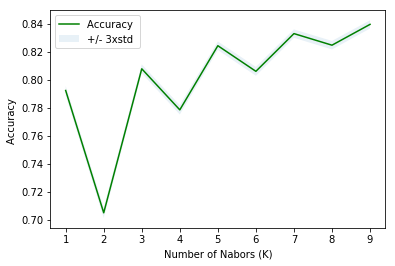

In [219]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
#plt.tight_layout()
#plt.show()

## Building model using Decision Tree